In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| hide
from cv_tools.core import *
from cv_tools.cv_ops import *
from cv_tools.compress_and_filter import *
from pathlib import Path    
from fastcore.all import *

# cv_tools

> computer vision related tools

This file will become your README and also the index of your documentation.

## Install

```sh
git clone `git@github.com:HasanGoni/cv_tools.git`
cd cv_tools
pip install -e . 
```
- in case of github is not recognized with `ssh` then use
```sh
git clone `https://github.com/HasanGoni/cv_tools.git`
cd cv_tools
pip install -e .

```

## How to use

you have a list of filenames with full path, but you are interested to get only the name of the list in a vectorize format

In [ ]:
#| hide
from fastcore.all import *
#from cv_tools.core import *
import cv2
from typing import Union, List, Any, Tuple, Dict, Callable 
from PIL import Image
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
dpi = mpl.rcParams['figure.dpi']
mpl.rcParams['image.cmap']='gray'

In [ ]:
HOME = Path.home()
DATA_PATH = Path(f'{HOME}/Schreibtisch/projects/data/microscopy')
MASK_PATH = Path(f'{DATA_PATH}/patch_train_masks/img_0_p_0.png')
IM_PATH = Path(f'{DATA_PATH}/patch_train_images/img_0_p_0.png')
DATA_PATH.ls()

(#9) [Path('/home/hasan/Schreibtisch/projects/data/microscopy/patch_mask_train_coco_format.json'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/patch_mask_val_coco_format.json'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_images.cache'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/train_images'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_images'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_masks'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/data.yaml'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/train_msks'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train')]

In [ ]:
path = Path(fr'{HOME}/Schreibtisch/projects/git_data')  
path_list = path.ls()
path_list

(#7) [Path('/home/hasan/Schreibtisch/projects/git_data/senet_segmentation'),Path('/home/hasan/Schreibtisch/projects/git_data/segmentation_test'),Path('/home/hasan/Schreibtisch/projects/git_data/cv_tools_office'),Path('/home/hasan/Schreibtisch/projects/git_data/yolo_v8_segmentation'),Path('/home/hasan/Schreibtisch/projects/git_data/labeling_test'),Path('/home/hasan/Schreibtisch/projects/git_data/rc_files_for_me'),Path('/home/hasan/Schreibtisch/projects/git_data/cv_tools')]

In [ ]:
get_name_(path_list)

array(['fastsetup', 'fine_tune_SAM', 'cv_tools', 'labeling_test'],
      dtype='<U13')

### Reading image in PIL and opencv

- So you have some files, sometimes you wanted read image as `opencv` and sometimes you wanted to use `PIL` to read those image

In [ ]:
# opencv image
img = read_img(
    im_path = IM_PATH,
    cv=True, # if PIL image just say cv=True, 
    gray=True # in case of color image just use gray=False
)

In case you want to see the image

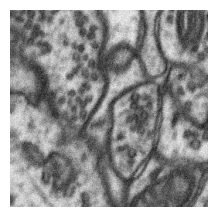

In [ ]:
show_(img)

Same way we can see PIL image.

In [ ]:
# PIL image
img = read_img(
    im_path = IM_PATH,
    cv=False, 
    gray=True # in case of color image just use gray=False
)

PIL image doesnot need `show` method in jupyter notebook. you can just do following

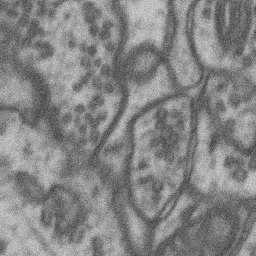

In [ ]:
img

In [ ]:
# Visualize image


In [ ]:
- In case of list of images need to be visualized

In [ ]:
plot_images_grid(
    images=images,
    rows=1, # number of rows
    cols=2 # number of columns
)


### Cropping your image

- so you have an image, you want to do centercrop from this image, but you want to make sure, your image has a specific shape

- Remember here you need PIL Image. Opencv image can be easily converted using this  `Image.fromarray` 

In [ ]:
img.size

(256, 256)

our mask has a shape of `256,256`, lets centercrop it and make sure it has a shape of `224,224`

In [ ]:
crop_mask = center_crop(
        img, 
        desired_width=224,
        desired_height=224,
        height_offset=0,
        width_offset=0,
        cv=False
    )

 crop image has a size of (224, 224)


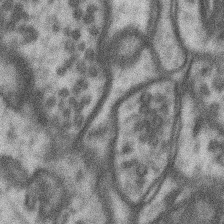

In [ ]:
print(f' crop image has a size of {crop_mask.size}')
crop_mask

- If expected to have a opencv image, then use `cv=True`

In [ ]:
crop_mask_ocv = center_crop(
        img, 
        desired_width=224,
        desired_height=224,
        height_offset=0,
        width_offset=0,
        cv=True
    )

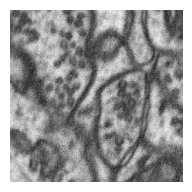

In [ ]:
show_(crop_mask_ocv)

#### Overlay Image and Mask

- In case of want to see overlay imagea and mask in a same image

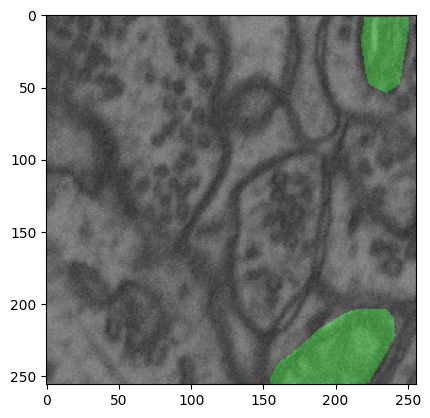

In [ ]:
overlay_mask(
    im_path=IM_PATH,
    msk_path=MASK_PATH,
    alpha=0.3 # visibility opacity
)

- Sometimes one needs to see not the mask but the border line of the mask

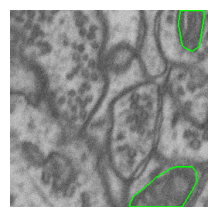

In [ ]:
overlay_mask_border_on_image(
    im_path=IM_PATH,
    msk_path=MASK_PATH,
    save_new_img_path=None, # in case you want to save overlay mask then give path name
    border_width=1,
    show_=True

)

- Sometimes you want to compare another image to the overlay image, then just use this image
- just an example we are adding the mask again

In [ ]:
new_image = cv2.cvtColor(read_img(IM_PATH, cv=True), cv2.COLOR_GRAY2RGB)

In [ ]:
new_image.shape

(256, 256, 3)

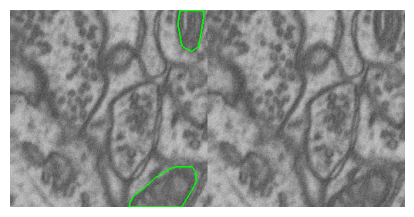

In [ ]:
overlay_mask_border_on_image(
    im_path=IM_PATH,
    msk_path=MASK_PATH,
    new_img=new_image,
    save_new_img_path=None, # in case you want to save this new image
    border_width=1,
    show_=True

)

#### Concatenating images

- Sometimes you have 2 or more images, and you want to create a single image from these images
- if desired one small text can be added in this new image

In [ ]:
images = [new_image, new_image]

In [ ]:
combined_img = concat_images(
    images= images,
    rows=1,
    cols=2,
    number='combined'
)

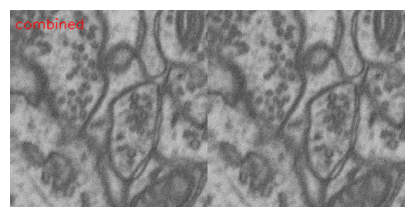

In [ ]:
show_(combined_img)

In [ ]:
combined_img = concat_images(
    images= images,
    rows=2,
    cols=1,
    number='combined'
)

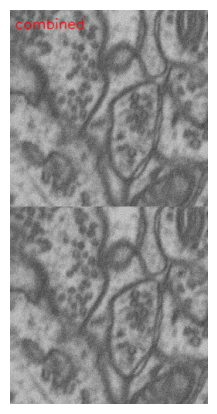

In [ ]:
show_(combined_img)

- So you have one image where could be lots of masks or single masks, you doesn't want to see full image, but only mask part of the image, with image

In [ ]:
IM_PATH.parent

Path('/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_images')

In [ ]:
show_poster_from_path(
    mask_path=MASK_PATH,
    im_path=IM_PATH.parent, # Remember here not the full image path,\
                        #but only folder name, from this folder 
                        # Same file name as mask_path name will be
                        # searched
    show_='poster', # only mask
    text='test_poster'
)


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/resize.cpp:4065: error: (-215:Assertion failed) inv_scale_x > 0 in function 'resize'


- In case of single poster, it is not helpful, When you have lot's of small objects, then may be it is interesting

#### Get Template part from an image

- So you have a template image, and you want to get this template from this image, 
- following function will give bounding box (x, y, w, h format) of template part from this image

In [ ]:
x, y, w, h=get_template_part(
    img=read_img(IM_PATH, cv=True),
    tmp_img=tmp_im_path
)
tmp_part = img[y:y +h, x: x+w]

In [ ]:
> in case of only tempalte part is needed
tmp_part = get_template_part_img(
    im=img, # actual image
    tm_im=tmplate_image, # template image
)


#### Finding contour from a binary mask

In [ ]:
img = read_img(IM_PATH, cv=True, gray=True)

In [ ]:
contours = find_contours_binary(
    img
)
len(contours)

1

#### Apply multiple thresholding in an image

- You have any image, and you want to segment it based on its value

In [ ]:
img = read_img(IM_PATH, cv=True, gray=True)

In [ ]:
thrs_img = multi_otsu(img, classes=3)

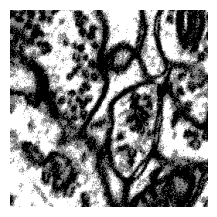

In [ ]:
show_(thrs_img)

#### Split Image

- So you have an image, and you want to cut your images in smaller parts.
- last part will not be same like other parts, because possible extra part or smaller part

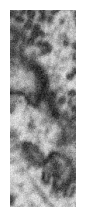

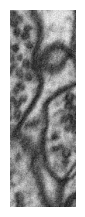

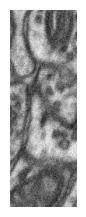

In [ ]:
splitted_parts = split_image(img, num_splits=3, direction='horizontal')
show_(splitted_parts)

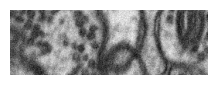

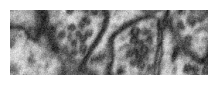

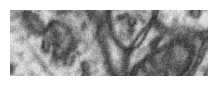

In [ ]:
splitted_parts_v = split_image(img, num_splits=3, direction='vertical')
show_(splitted_parts_v)

# Background Normalization

#### Correction of Masks

- So you have a binary mask, but there are some small holes in that mask
- so want to fill those holes inside your mask

In [ ]:
filled_mask = fill_holes_in_objects(binaray_mask)

- Sometimes you have some smaller parts in your masks and you want to remove those smaller parts from the mask

In [ ]:
remove_small_objects(
    binary_mask=binary_mask,
    size_threshold=size_threshold
)

- May be you want to see each object in the mask put a number in each object and based on this number, you just remove a object from the mask

In [ ]:
labels, new_labels = show_labeled_mask(
    msk_path
)

In [ ]:
remove_object_from_mask(mask, object_id_list=[1])

#### check data

- in case of check validity of mask, you can create a overlay mask and check if it is correct or not, 
  - `overlay_mask_path` - is the saved image path
  - `move_path` - is the path where you want to move the mask ( in case of mask is not correct)
  - `im_height` - height of the image

In [ ]:
display_image_row(
    im_path=overlay_mask_path,
    move_path=move_path,
    max_images=10,
    start=0,
    im_height=200,
    im_width=200,

)

In [ ]:
img, _=get_single_sample(
    split='train',
    INDEX=0,
    name='hasangoni/Electron_microscopy_dataset',
    type='numpy'
)

In [ ]:
b_img = rolling_ball_substraction(image=img, radius=50)
b_img_60 = rolling_ball_substraction(image=img, radius=60)
b_img_70 = rolling_ball_substraction(image=img, radius=70)
b_img_90 = rolling_ball_substraction(image=img, radius=90)
b_img_100 = rolling_ball_substraction(image=img, radius=100)

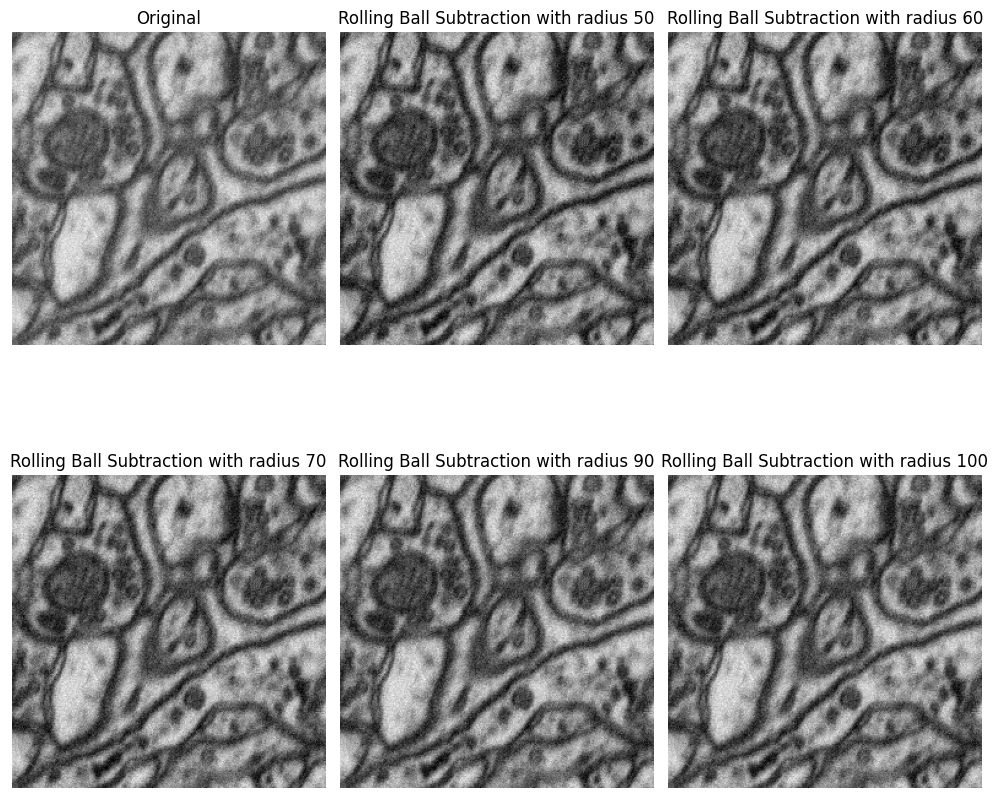

In [ ]:
show_images_(
    images=[img, b_img, b_img_60, b_img_70, b_img_90, b_img_100], 
    titles=[
        'Original', 
        'Rolling Ball Subtraction with radius 50', 
        'Rolling Ball Subtraction with radius 60', 
        'Rolling Ball Subtraction with radius 70', 
        'Rolling Ball Subtraction with radius 90', 
        'Rolling Ball Subtraction with radius 100'])

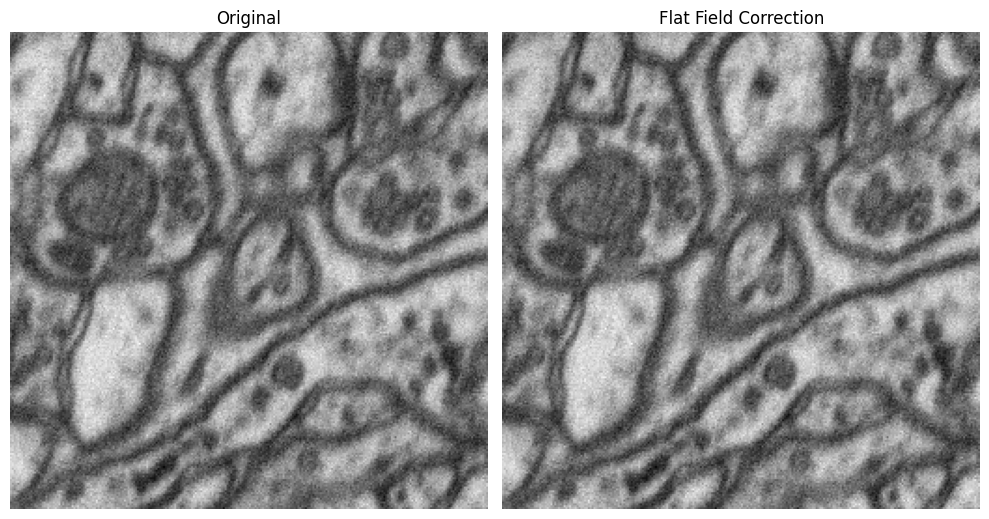

In [ ]:
flat_field_img = flat_field_correction(
    image=img,
    background_estimate=None,
    sigma=50,
)

show_images_(
    images=[img, flat_field_img], 
    titles=['Original', 'Flat Field Correction'])

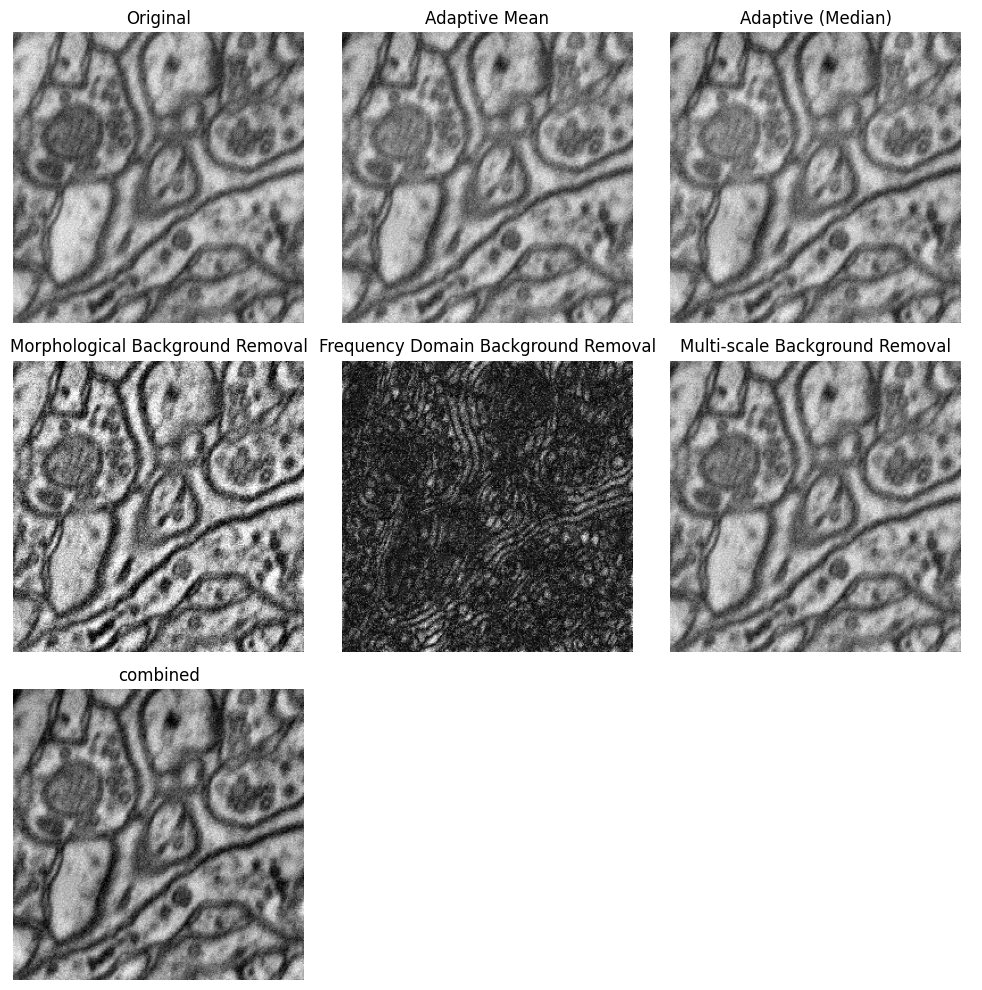

In [ ]:
adaptive_img = adaptive_background_normalization(
    image=img,
    block_size=64,
    method='mean',
)

adaptive_img_median = adaptive_background_normalization(
    image=img,
    block_size=64,
    method='median',
)

morphological_img = morphological_background_removal(
    image=img,
    kernel_size=15,
)
frequency_img = frequency_domain_background_removal(
    image=img,
    cutoff_frequency=0.1,
)
multi_scale_img = multi_scale_background_removal(
    image=img,
    scales=[10, 30, 50],
)
processed_img = process_image_background_normalization(
    image_path=img,
    method='combined',
)

show_images_(
    images=[img, adaptive_img, adaptive_img_median, morphological_img, frequency_img, multi_scale_img, processed_img], 
    titles=[
        'Original', 'Adaptive Mean', 'Adaptive (Median)', 
        'Morphological Background Removal', 'Frequency Domain Background Removal', 
        'Multi-scale Background Removal', 'combined'])

**process_images_parallel_bg_normalization** is also implemented

## Compress and filter

In [ ]:
im_path = Path(r'/home/ai_sintercra.work/Fail_start20240402/_unzip/main_im2_cropped')
msk_path = Path(im_path.parent, 'main_im2_cropped_masks')
convert_image_to_parquet_p(
    im_path=im_path,
    file_name_func=None,
    file_exts='.png',
    threadpool=False)

### decode image if the image size small

In [ ]:
images = read_images_from_parquet(
    parquet_path=Path(parquet_path)
    num_workers=4
)

### decode image if the image size big


In [ ]:

decode_batch(
    pr_path=Path(pr_path),
    batch_size=600,
    num_workers=4, 
    output_dir=Path(output_dir)
)

# Get interactive interface to get coordinates of the image

In [ ]:
interactive_get_coordinates(
	img=img) # image will be image



> then it will create an interactive interface you need to click bounding box of the image,
- r -reset
- Escapae- done
- after that you will get a list of coordinates of the image